In [277]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [278]:
df = pd.read_csv('../deceptive-opinion.csv')

In [279]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [280]:
df = df.drop(["hotel", "polarity","source"], axis=1)

In [281]:
df.head()

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...


In [282]:
df1=df.sample(frac=1)

In [283]:
df1.head()

,deceptive,text
946,truthful,WARNING: FOOD POISONING ALERT!!! The room was ...
1180,truthful,In from Minneapolis and was hoping to stay on ...
680,deceptive,I've stayed at several different hotels in Chi...
1094,truthful,Visiting during a busy 2day conference in Chic...
159,truthful,"OK, we are back from the Knickerbocker and I w..."


In [284]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df1['deceptive']= label_encoder.fit_transform(df1['deceptive']) 

df1['deceptive'].unique() 

array([1, 0])

In [285]:
df1.head()

,deceptive,text
946,1,WARNING: FOOD POISONING ALERT!!! The room was ...
1180,1,In from Minneapolis and was hoping to stay on ...
680,0,I've stayed at several different hotels in Chi...
1094,1,Visiting during a busy 2day conference in Chic...
159,1,"OK, we are back from the Knickerbocker and I w..."


In [286]:
df1.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [287]:
X = df1.text
y = df1.deceptive

In [288]:
# Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [289]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [290]:
df1.head()

,deceptive,text
946,1,WARNING: FOOD POISONING ALERT!!! The room was ...
1180,1,In from Minneapolis and was hoping to stay on ...
680,0,I've stayed at several different hotels in Chi...
1094,1,Visiting during a busy 2day conference in Chic...
159,1,"OK, we are back from the Knickerbocker and I w..."


In [291]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_data(text):
    """
        text: a string
        
        return: modified initial string
    """
    # text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text
    
df1['text'] = df1['text'].apply(clean_data)

In [292]:
X = df1.text
y = df1.deceptive

In [293]:
X = X.map(lambda a: clean_data(a))

In [294]:
import tensorflow
from tensorflow import keras
from __future__ import print_function
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras import initializers, regularizers, constraints

In [295]:
train, test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [296]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)

In [297]:
tokenizer.fit_on_texts(X)

In [298]:
x_train = tokenizer.texts_to_sequences(train)

In [299]:
x_test = tokenizer.texts_to_sequences(test)

In [300]:
word_index = tokenizer.word_index

In [301]:
X = tokenizer.texts_to_sequences(X)

In [302]:
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in X)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in X])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in X])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 9635
Longest comment size: 795
Average comment size: 150.44875
Stdev of comment size: 88.50470254985042
Max comment size: 415


In [303]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [304]:
processed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
processed_post_x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')

In [305]:
processed_x_train = pad_sequences(x_train, maxlen=max_len)
processed_x_test = pad_sequences(x_test, maxlen=max_len)

In [306]:
processed_pre_x_train = pad_sequences(x_train, maxlen=max_len)
processed_pre_x_test = pad_sequences(x_test, maxlen=max_len)

In [307]:
print('x_train shape:', processed_x_train.shape)
print('x_test shape:', processed_x_test.shape)

x_train shape: (1200, 415)
x_test shape: (400, 415)


In [308]:
import tensorflow
from tensorflow import keras
from keras.engine.topology import Layer

In [309]:
import tensorflow
from tensorflow import keras
import tensorflow.keras.backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Nadam
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.python.keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [310]:
import os

In [311]:
embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [312]:
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [313]:
class Attention(keras.layers.Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 name='{}_W'.format(self.name),
                                 initializer=self.init,
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     name='{}_b'.format(self.name),
                                     initializer='zero',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [314]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, concatenate
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model

In [315]:
import tensorflow.keras.backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from tensorflow.python.keras.layers import Bidirectional
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Nadam
from tensorflow.python.keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [316]:
from tensorflow.keras import backend as K

In [317]:
def get_model():
    review_input = Input(shape=(max_len,), dtype='int32')
    review_input_post = Input(shape=(max_len,), dtype='int32')


    x1 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input)
    x1 = Bidirectional(LSTM(60, return_sequences=True))(x1)
    x1 = Attention(max_len)(x1)
    x1 = Dropout(0.3)(x1)

    x2 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input_post)
    x2 = Bidirectional(LSTM(60, return_sequences=True))(x2)
    x2 = Attention(max_len)(x2)
    x2 = Dropout(0.3)(x2)

    x = concatenate([x1, x2])
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    preds = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[review_input, review_input_post], outputs=preds)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [318]:
model = get_model()

In [319]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           [(None, 415)]        0                                            
__________________________________________________________________________________________________
input_42 (InputLayer)           [(None, 415)]        0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 415, 100)     963600      input_41[0][0]                   
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 415, 100)     963600      input_42[0][0]                   
____________________________________________________________________________________________

In [320]:
from keras.callbacks import ModelCheckpoint

In [321]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [322]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=10)

In [323]:
history = model.fit([processed_x_train,processed_pre_x_train],y_train, validation_data=([processed_x_test,processed_pre_x_test],y_test), epochs=15,batch_size=32,callbacks=[early_stopping_monitor],verbose=1)

Epoch 1/15
38/38 [==============================] - 21s 357ms/step - loss: 0.7720 - accuracy: 0.4887 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 2/15
38/38 [==============================] - 12s 320ms/step - loss: 0.6801 - accuracy: 0.5913 - val_loss: 0.6926 - val_accuracy: 0.5050
Epoch 3/15
38/38 [==============================] - 13s 340ms/step - loss: 0.6404 - accuracy: 0.6218 - val_loss: 0.6116 - val_accuracy: 0.7100
Epoch 4/15
38/38 [==============================] - 12s 321ms/step - loss: 0.4813 - accuracy: 0.7706 - val_loss: 0.5749 - val_accuracy: 0.7175
Epoch 5/15
38/38 [==============================] - 15s 387ms/step - loss: 0.3698 - accuracy: 0.8513 - val_loss: 0.7835 - val_accuracy: 0.6300
Epoch 6/15
38/38 [==============================] - 15s 387ms/step - loss: 0.4007 - accuracy: 0.8202 - val_loss: 0.3949 - val_accuracy: 0.8225
Epoch 7/15
38/38 [==============================] - 14s 377ms/step - loss: 0.2060 - accuracy: 0.9140 - val_loss: 0.3510 - val_accuracy: 0.8300

In [324]:
model.evaluate([processed_x_test,processed_pre_x_test],y_test)

13/13 [==============================] - 1s 86ms/step - loss: 0.4804 - accuracy: 0.8625


[0.4804157316684723, 0.862500011920929]

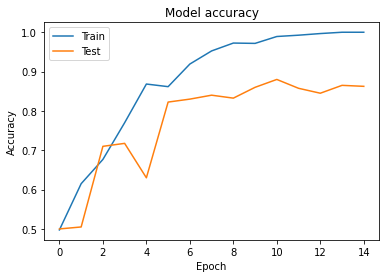

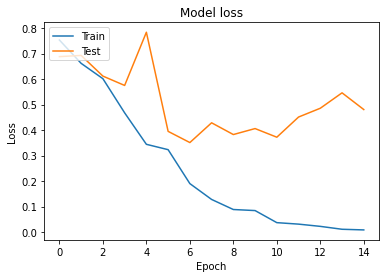

In [325]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()